In [1]:
##Importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Handling Null Values
data.isna().any()

v1    False
v2    False
dtype: bool

In [8]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
# Handling Duplicate Values
data['v2'].nunique()

5169

In [10]:
data.shape

(5572, 2)

In [11]:
data['v2'].drop_duplicates(inplace = True)

In [12]:
data.shape

(5572, 2)

In [13]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [14]:
data.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [15]:
data['lenght']=data['v2'].apply(len)
data.head()

,v1,v2,lenght
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
data.describe()

,lenght
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


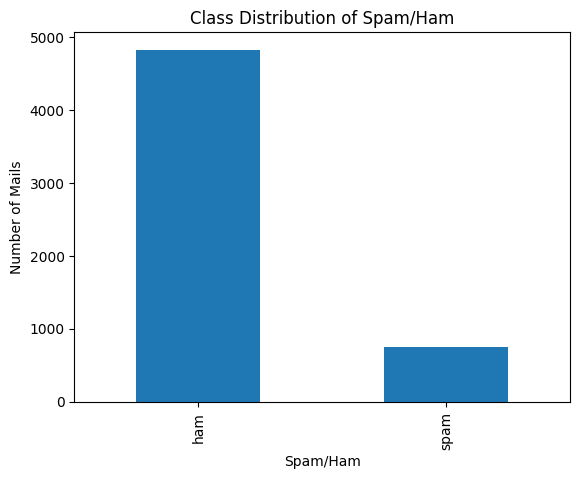

In [17]:
# Create a bar plot of the class distribution
class_counts = data['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

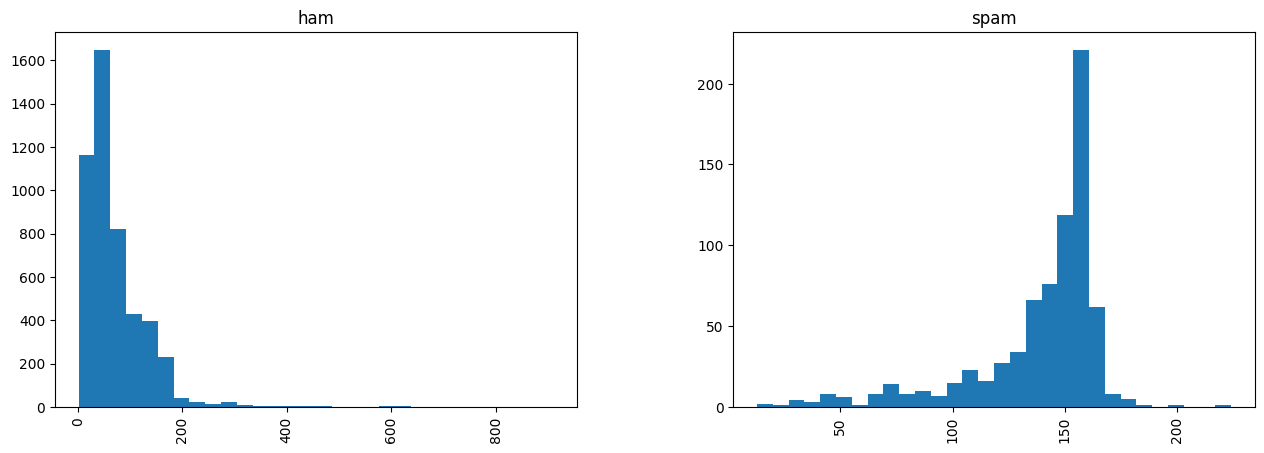

In [18]:
%matplotlib inline

#Plotting the lenght of ham and spam messages
data.hist(by='v1',column='lenght',bins=30,figsize=[15,5])

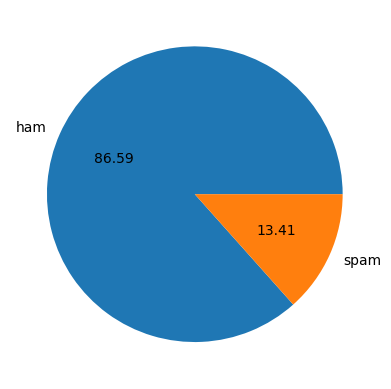

In [19]:
plt.pie(data['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

<ipython-input-20-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

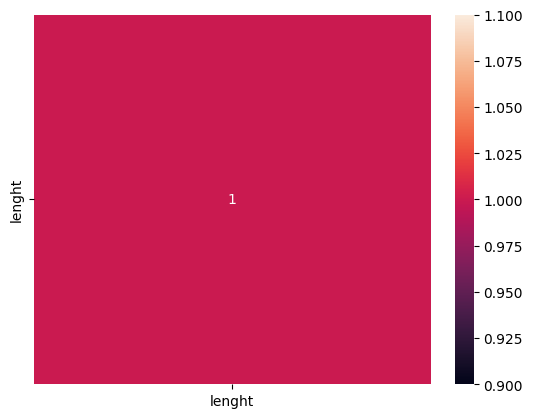

In [20]:
sns.heatmap(data.corr(),annot=True)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [22]:
X=data['v2'].values
y=data['v1'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=2)

In [24]:
cv=CountVectorizer()
X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)

In [25]:
from sklearn.svm import SVC
classifier =SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [26]:
classifier.score(X_test,y_test)

0.9564827276805743